## GRIP: The Spark Foundation

## Data science and Business Analytics Intern

## Author: Swapna Singarapalli

## Task8- Timeline Analysis: Covid-19

Create a storyboard showing spread of Covid-19 cases 
Dataset: Daily updated .csv file on https://bit.ly/30d2gdi


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24-02-2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247410,ZWE,Africa,Zimbabwe,30-12-2022,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
247411,ZWE,Africa,Zimbabwe,31-12-2022,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
247412,ZWE,Africa,Zimbabwe,01-01-2023,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
247413,ZWE,Africa,Zimbabwe,02-01-2023,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [5]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24-02-2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247415 entries, 0 to 247414
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    247415 non-null  object 
 1   continent                                   233507 non-null  object 
 2   location                                    247415 non-null  object 
 3   date                                        247415 non-null  object 
 4   total_cases                                 233322 non-null  float64
 5   new_cases                                   233076 non-null  float64
 6   new_cases_smoothed                          231872 non-null  float64
 7   total_deaths                                213837 non-null  float64
 8   new_deaths                                  213771 non-null  float64
 9   new_deaths_smoothed                         212585 non-null  float64
 

In [7]:
df.shape

(247415, 67)

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 67)


In [9]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.333220e+05,2.330760e+05,2.318720e+05,2.138370e+05,213771.000000,212585.000000,232260.000000,232014.000000,230815.000000,212788.000000,...,148696.000000,97989.000000,177178.000000,226997.000000,194229.000000,2.463530e+05,8.215000e+03,8215.000000,8254.000000,8215.000000
mean,4.968105e+06,1.210935e+04,1.214504e+04,7.765607e+04,130.157201,130.737365,68463.965704,183.594409,184.091005,728.636981,...,32.816974,50.879527,3.087760,73.606922,0.724633,1.407499e+08,5.024999e+04,10.118616,14.099180,1441.108602
std,3.075851e+07,8.365669e+04,8.132286e+04,3.969740e+05,704.087196,689.493626,117823.155374,1148.076170,680.391935,1008.753716,...,13.537653,31.870562,2.551026,7.446807,0.149595,6.922786e+08,1.382689e+05,13.333355,25.892159,1805.727888
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281517
25%,5.220250e+03,0.000000e+00,5.143000e+00,1.200000e+02,0.000000,0.000000,1263.846000,0.000000,1.086000,32.108000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.367830e+05,6.055000e+01,0.830000,0.082500,40.384378
50%,5.766350e+04,4.300000e+01,8.428600e+01,1.302000e+03,0.000000,1.286000,12386.654000,5.703500,17.257000,232.924000,...,33.100000,49.839000,2.500000,75.050000,0.742000,6.948395e+06,6.465400e+03,7.720000,7.415000,877.096776
75%,5.986360e+05,8.780000e+02,1.060322e+03,1.060800e+04,12.000000,14.286000,81299.587000,89.199000,129.423500,1082.912000,...,41.300000,83.241000,4.200000,79.070000,0.838000,3.369661e+07,3.651575e+04,15.820000,19.150000,2300.905649
max,6.616078e+08,4.083956e+06,3.439397e+06,6.695049e+06,17733.000000,14859.286000,704359.453000,228872.025000,36421.827000,6409.799000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.240196e+06,76.550000,376.770000,10047.884420


In [10]:
df.count()

iso_code                                   247415
continent                                  233507
location                                   247415
date                                       247415
total_cases                                233322
                                            ...  
population                                 246353
excess_mortality_cumulative_absolute         8215
excess_mortality_cumulative                  8215
excess_mortality                             8254
excess_mortality_cumulative_per_million      8215
Length: 67, dtype: int64

## Checking for count of NULL values for each column:

In [11]:
df.isnull()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247410,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
247411,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
247412,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
247413,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [12]:
df.isnull().sum()

iso_code                                        0
continent                                   13908
location                                        0
date                                            0
total_cases                                 14093
                                            ...  
population                                   1062
excess_mortality_cumulative_absolute       239200
excess_mortality_cumulative                239200
excess_mortality                           239161
excess_mortality_cumulative_per_million    239200
Length: 67, dtype: int64

In [13]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,24-02-2020,5.0,5.0,NaN,NaN,NaN
1,25-02-2020,5.0,0.0,NaN,NaN,NaN
2,26-02-2020,5.0,0.0,NaN,NaN,NaN
3,27-02-2020,5.0,0.0,NaN,NaN,NaN
4,28-02-2020,5.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
247410,30-12-2022,259981.0,0.0,5637.0,NaN,NaN
247411,31-12-2022,259981.0,0.0,5637.0,NaN,NaN
247412,01-01-2023,259981.0,0.0,5637.0,NaN,NaN
247413,02-01-2023,259981.0,0.0,5637.0,NaN,NaN


In [14]:
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,24-02-2020,5.0,5.0,NaN,NaN,NaN
1,25-02-2020,5.0,0.0,NaN,NaN,NaN
2,26-02-2020,5.0,0.0,NaN,NaN,NaN
3,27-02-2020,5.0,0.0,NaN,NaN,NaN
4,28-02-2020,5.0,0.0,NaN,NaN,NaN


In [15]:
df1.date = pd.to_datetime(df.date)
df1.set_index('date', inplace = True)
df1.head()
df1.tail()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2022-12-30,259981.0,0.0,5637.0,NaN,NaN
2022-12-31,259981.0,0.0,5637.0,NaN,NaN
2023-01-01,259981.0,0.0,5637.0,NaN,NaN
2023-02-01,259981.0,0.0,5637.0,NaN,NaN
2023-03-01,259981.0,0.0,5637.0,NaN,NaN


Text(0.5, 0, 'Month')

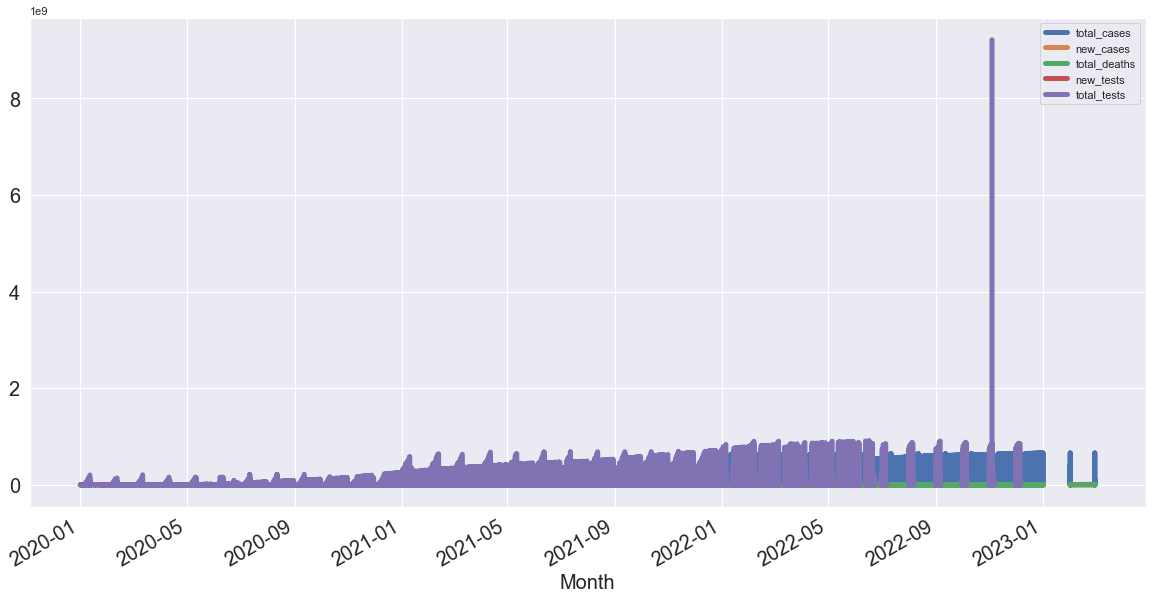

In [16]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

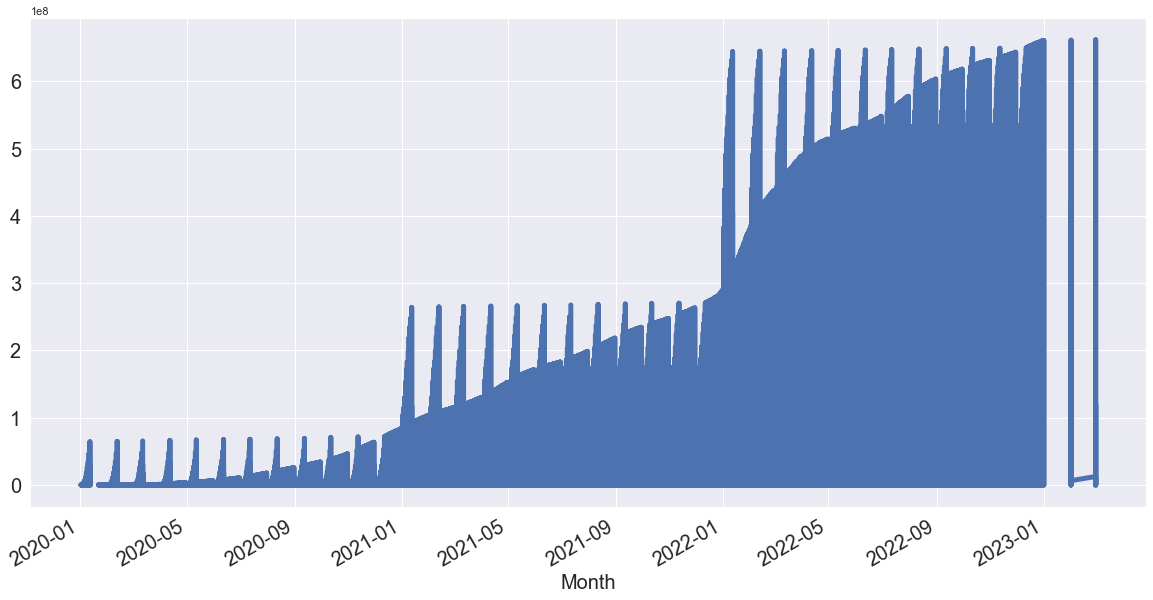

In [17]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

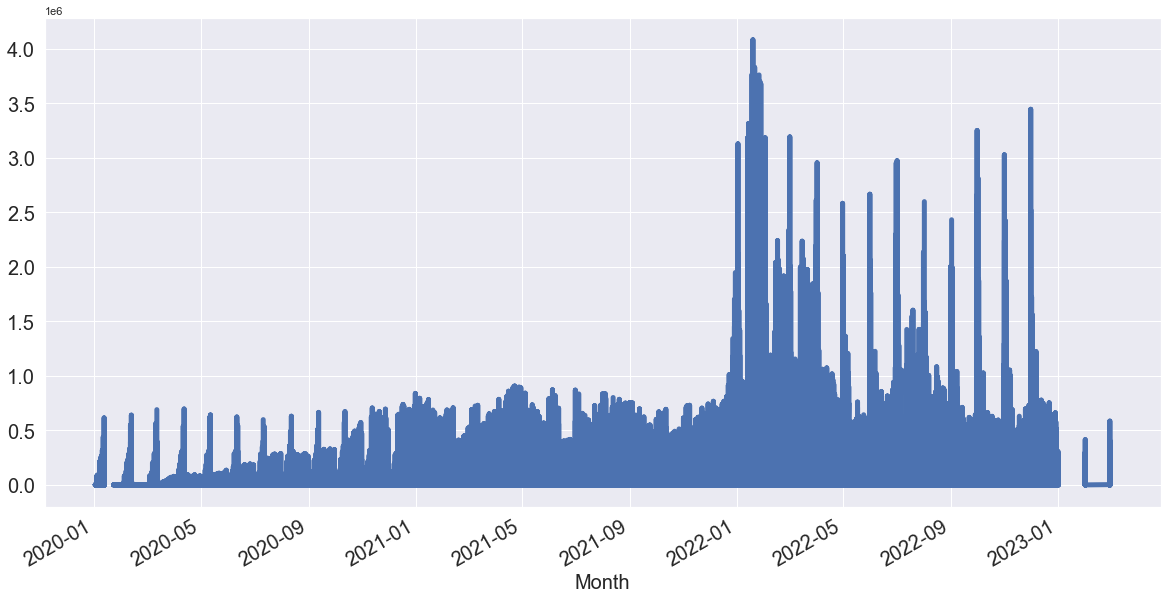

In [18]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

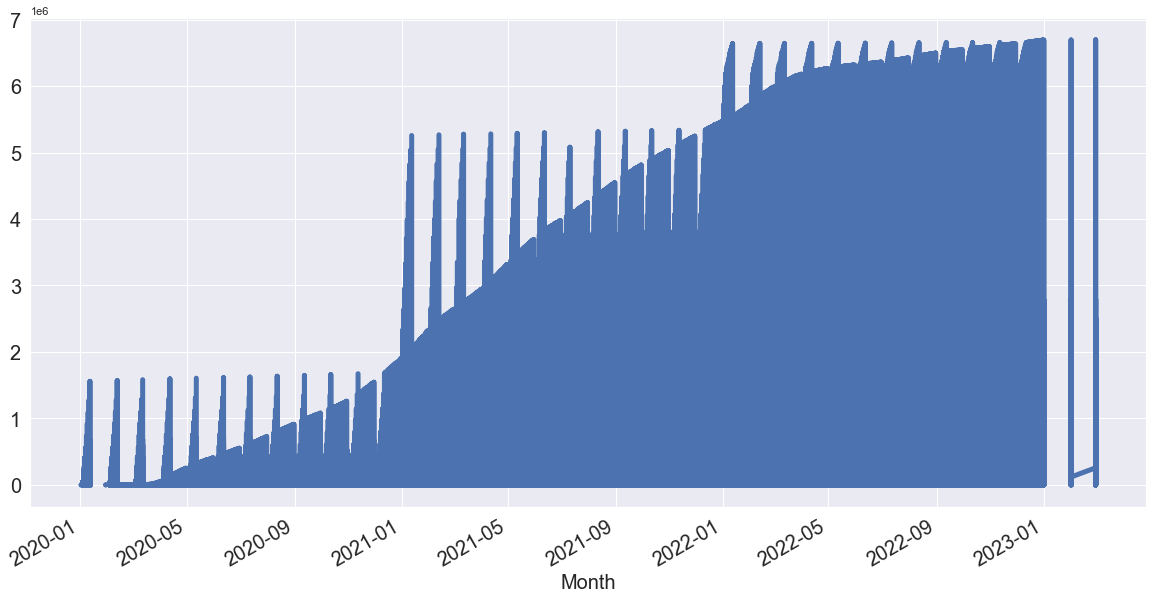

In [19]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

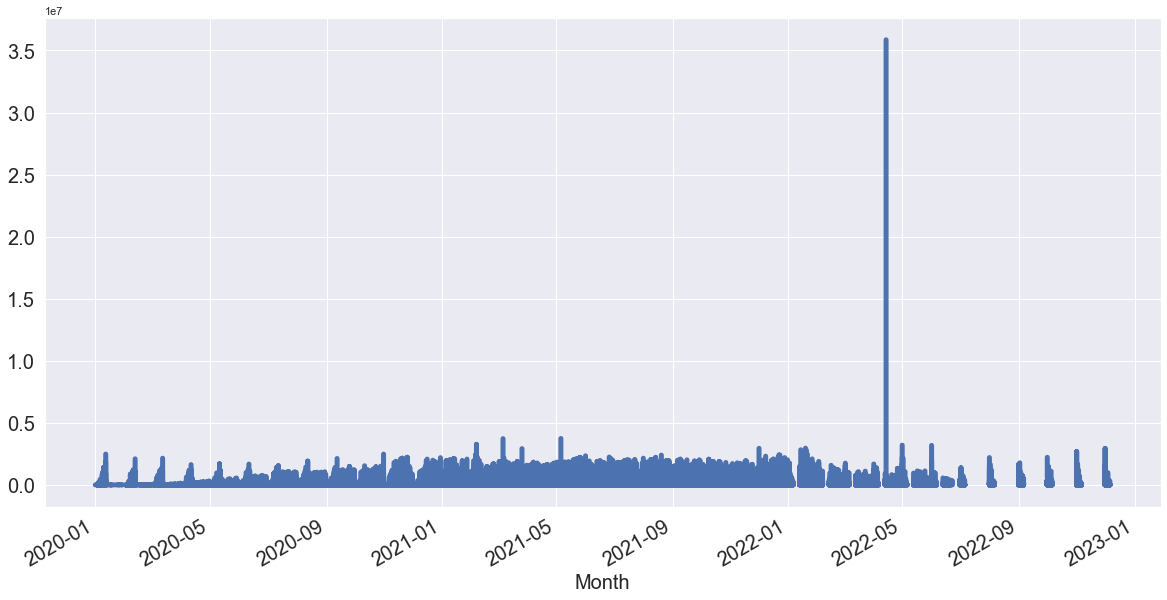

In [20]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

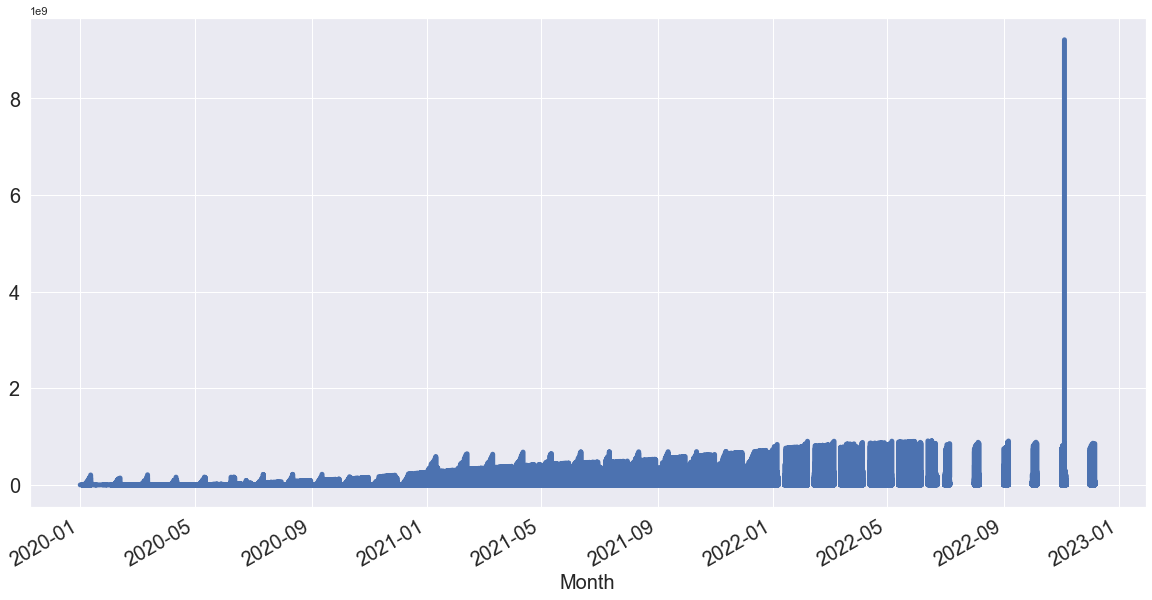

In [21]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

### Trends and Seasonality in TimeSeries Data

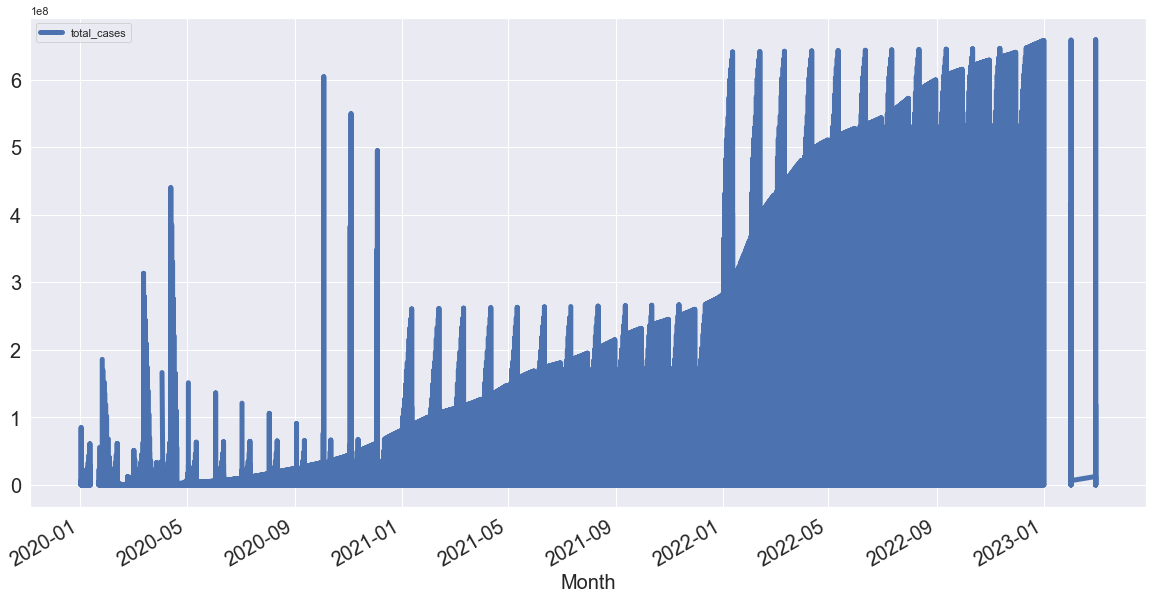

In [22]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

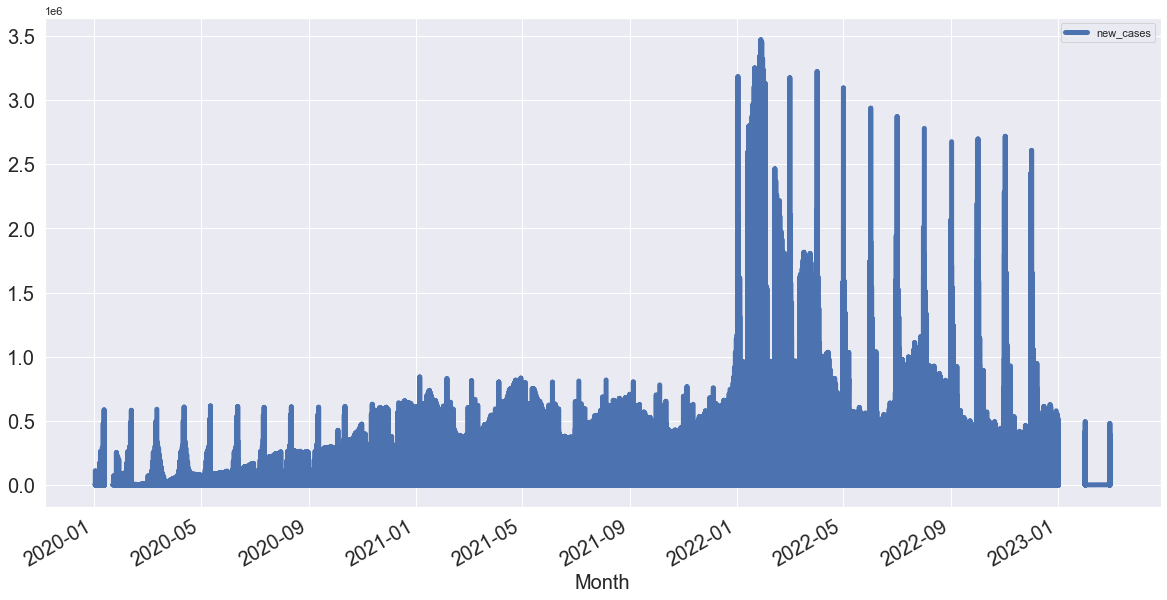

In [23]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

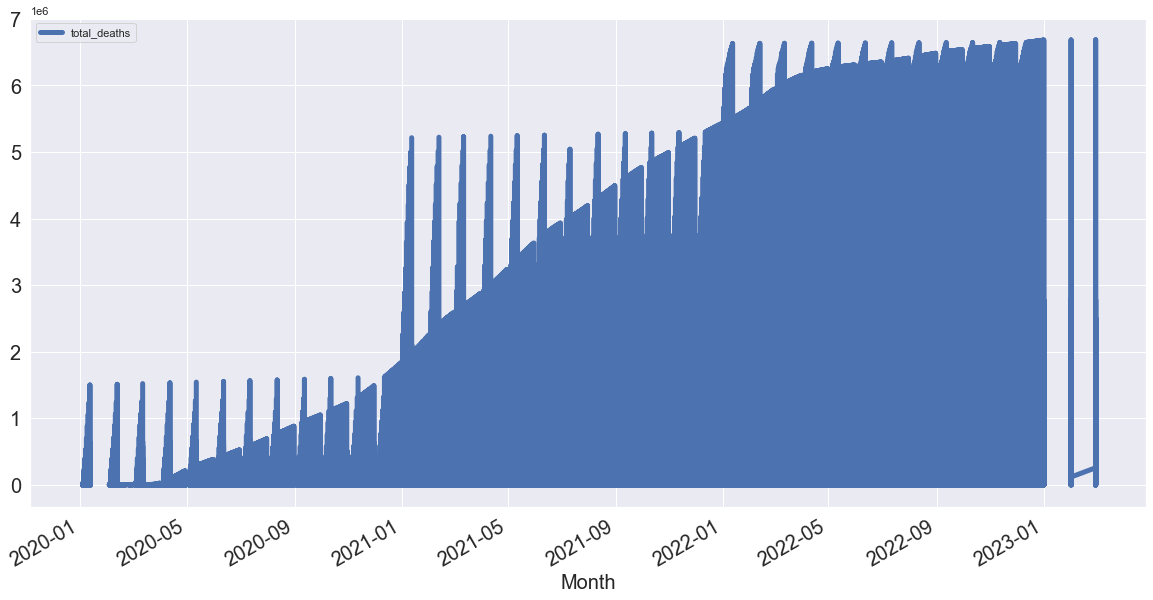

In [24]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);


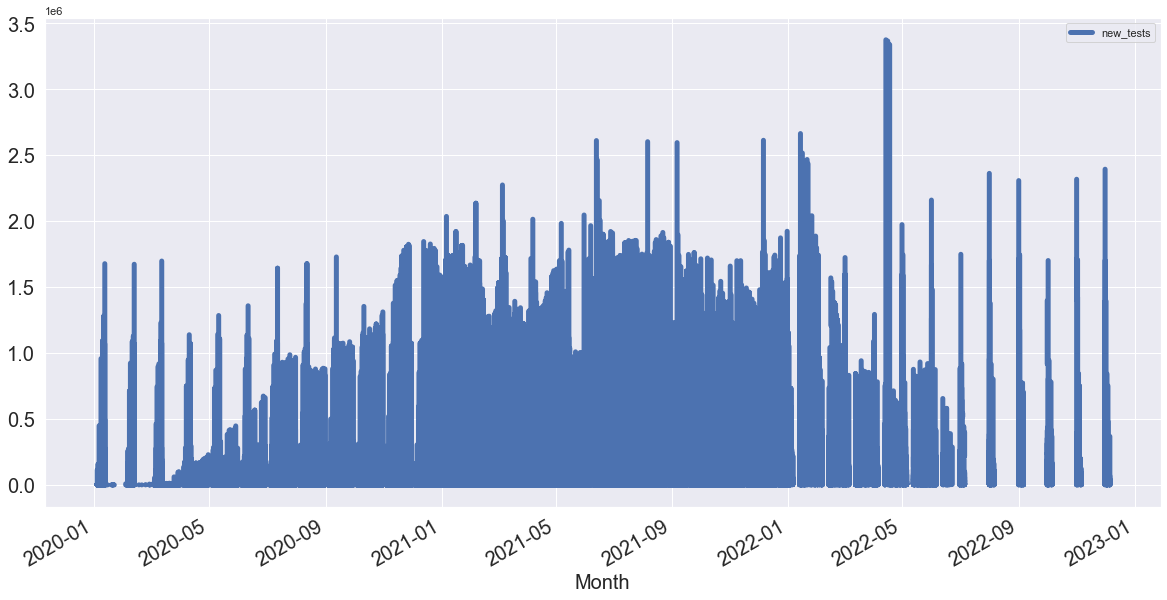

In [25]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

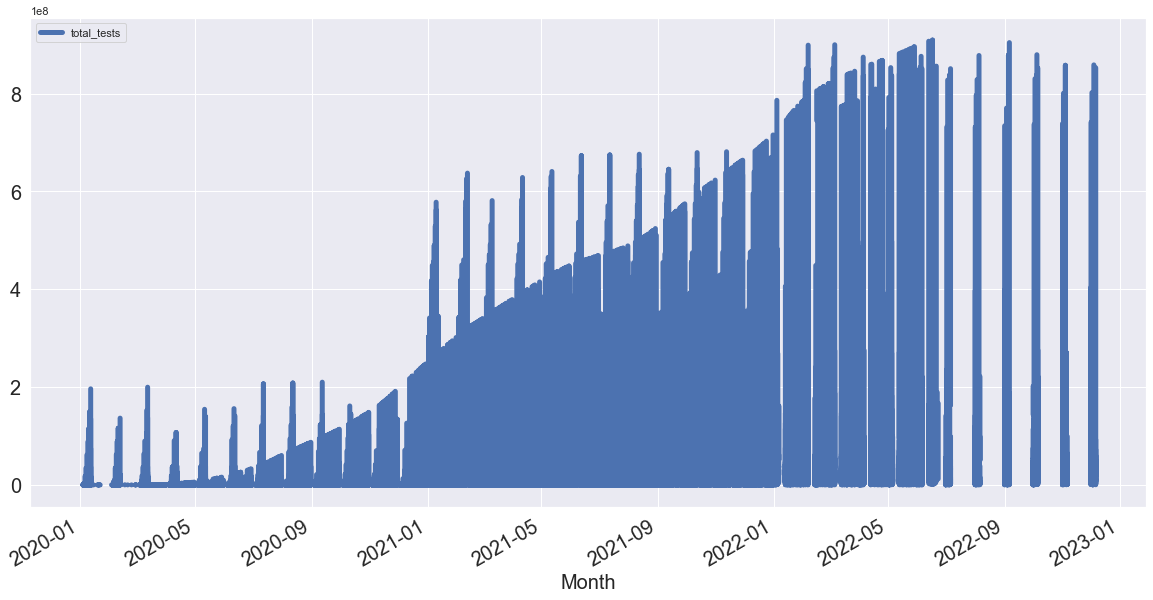

In [26]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

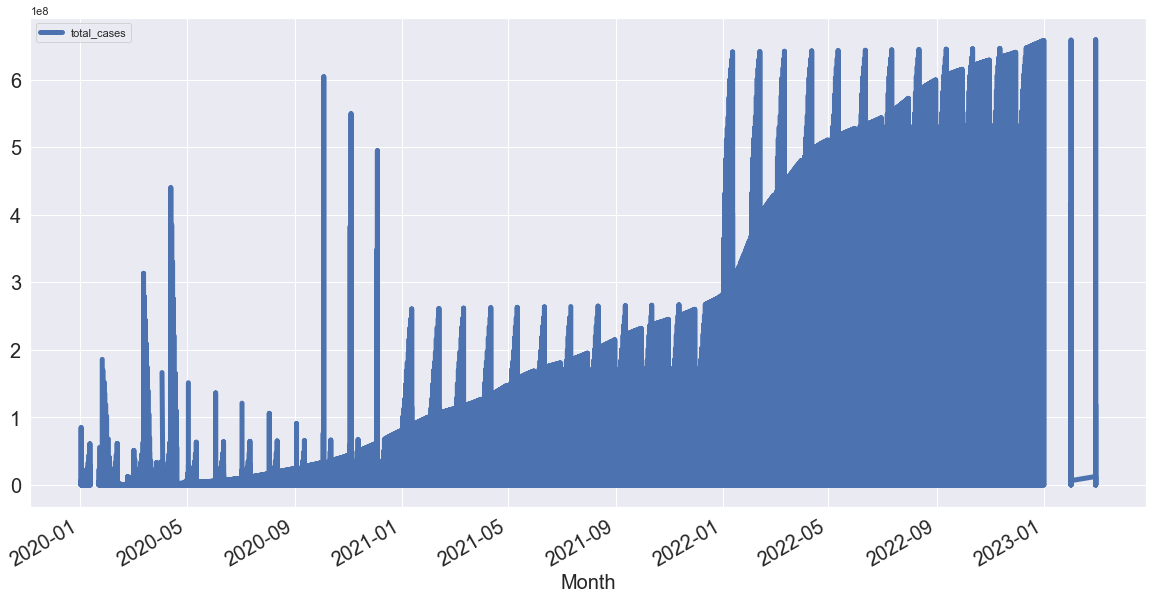

In [27]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);